In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import sys
import pandas as pd

from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from collections import Counter
from iteration_utilities import duplicates

In [2]:
np.set_printoptions(threshold=sys.maxsize)

plt.rcParams["figure.figsize"] = (20,20)

## Constants

In [1]:
alpha = 0.5
epsilon = 10e-3

## Utilities

In [4]:
def plot_surface(f, title = '', xy_angle = 0, z_angle = 0):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    ax.view_init(xy_angle, z_angle)

    x = np.linspace(-1,1,100)
    y = np.linspace(-1,1,100)
    z = []

    X, Y = np.meshgrid(x, y)

    zs = np.array(f(np.ravel(X), np.ravel(Y)))
    Z = zs.reshape(X.shape)

    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter('{x:.02f}')

    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    return Z
    
    
def find_min(Z, Z_alpha):
    u, c = np.unique(Z_alpha, return_counts=True)
    dup = u[c > 1]

    Z_min = Z.min()
    Z_a_min = Z_alpha.min()

    duplicate_min = np.any(dup == Z_a_min)
    
    #print(Z)
    print('Z_min =', Z_min)
    print('Z_a_min =', Z_a_min)

    print()
    
    print('Preserves min =', not duplicate_min)

## Test functions

In [21]:
def f_triangle(x, y):

    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x >= -y)
    z[condition1] = 2*x[condition1] + y[condition1]
    
    condition2 = np.logical_and(x <= 0, x <= y)
    z[condition2] = -2*x[condition2] + y[condition2]

    condition3 = np.logical_and(x >= y, x <= -y)
    z[condition3] = -y[condition3]
    
    return z

    
def f_triangle_2(x, y):

    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, -y/2 <= x)
    z[condition1] = 2*x[condition1] + y[condition1]/2
    
    condition2 = np.logical_and(x <= 0, y >= x)
    z[condition2] = -x[condition2] + y[condition2]/2

    condition3 = np.logical_and(y <= x, x <= -y/2)
    z[condition3] = -y[condition3]/2
    
    return z

    
def f_triangle_3(x, y):

    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x >= -2*y)
    z[condition1] = 3*x[condition1]/2 + y[condition1]
    
    condition2 = np.logical_and(x <= 0, y >= x)
    z[condition2] = -2*x[condition2] + y[condition2]

    condition3 = np.logical_and(x >= y, x <= -2*y)
    z[condition3] = x[condition3]/3 - 4*y[condition3]/3
    
    return z


def f_triangle_4(x, y):

    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x >= -y/2)
    z[condition1] = 4*x[condition1] + y[condition1]
    
    condition2 = np.logical_and(x <= 0, x <= y/2)
    z[condition2] = -4*x[condition2] + y[condition2]

    condition3 = np.logical_and(x >= y/2, x <= -y/2)
    z[condition3] = -y[condition3]
    
    return z


def f_random(x, y):

    z = np.zeros_like(x)
    
    condition1 = np.logical_and(y >= 0, x >= y/4)
    z[condition1] = x[condition1]/3 + y[condition1]/6
    
    condition2 = np.logical_and(y <= 0, x >= 2*y/3)
    z[condition2] = x[condition2]/3 - 5*y[condition2]/9

    condition3 = np.logical_and(x <= -4*y/3, x <= 2*y/3)
    z[condition3] = -x[condition3]/3 - y[condition3]/9
    
    condition4 = np.logical_and(x >= -4*y/3, x <= y/4)
    z[condition4] = -x[condition4]/19 + 5*y[condition4]/19
    
    return z


def f_plane(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= -y, x <= y/2)
    z[condition1] = y[condition1]/2
    
    condition2 = np.logical_and(x >= y/2, x >= -2*y)
    z[condition2] = 3*x[condition2]/5 + y[condition2]/5

    condition3 = np.logical_and(x >= y/2, x <= -2*y)
    z[condition3] = x[condition3]/5 - 3*y[condition3]/5
    
    condition4 = np.logical_and(x <= y/2, x <= -y, x<=0)
    z[condition4] = -2*x[condition4]/3 - y[condition4]/6
    
    return z

In [6]:
def f_mod_1(x, y):
    
    return np.abs(x) + np.abs(y)


def f_mod_2(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, y >= 0)
    z[condition1] = x[condition1] + y[condition1]
    
    condition2 = np.logical_and(x <= 0, y >= 0)
    z[condition2] = -x[condition2] + y[condition2]

    condition3 = np.logical_and(x <= -y/2, y <= 0)
    z[condition3] = -x[condition3] - 3*y[condition3]/2
    
    condition4 = np.logical_and(x >= -y/2, y <= 0)
    z[condition4] = x[condition4] - y[condition4]/2
    
    return z

    
def f_mod_3(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= -y/2, y >= 0)
    z[condition1] = x[condition1] + 3*y[condition1]/2
    
    condition2 = np.logical_and(x <= -y/2, y >= 0)
    z[condition2] = -x[condition2] + y[condition2]/2

    condition3 = np.logical_and(x <= -y/2, y <= 0)
    z[condition3] = -x[condition3] - 3*y[condition3]/2
    
    condition4 = np.logical_and(x >= -y/2, y <= 0)
    z[condition4] = x[condition4] - y[condition4]/2
    
    return z

  
def f_mod_4(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= y/2, y >= 0)
    z[condition1] = x[condition1] + y[condition1]/2
    
    condition2 = np.logical_and(x <= y/2, y >= 0)
    z[condition2] = -x[condition2] + 3*y[condition2]/2

    condition3 = np.logical_and(x <= -y/2, y <= 0)
    z[condition3] = -x[condition3] - 3*y[condition3]/2
    
    condition4 = np.logical_and(x >= -y/2, y <= 0)
    z[condition4] = x[condition4] - y[condition4]/2
    
    return z

  
def f_mod_5(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= y, y >= 0)
    z[condition1] = x[condition1]
    
    condition2 = np.logical_and(x <= y, y >= 0)
    z[condition2] = -x[condition2] + 2*y[condition2]

    condition3 = np.logical_and(x <= -y/2, y <= 0)
    z[condition3] = -x[condition3] - 3*y[condition3]/2
    
    condition4 = np.logical_and(x >= -y/2, y <= 0)
    z[condition4] = x[condition4] - y[condition4]/2
    
    return z

    
def f_mod_6(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= -y, y >= 0)
    z[condition1] = x[condition1] + 2*y[condition1]
    
    condition2 = np.logical_and(x <= -y, y >= 0)
    z[condition2] = -x[condition2]

    condition3 = np.logical_and(x <= -y/2, y <= 0)
    z[condition3] = -x[condition3] - 3*y[condition3]/2
    
    condition4 = np.logical_and(x >= -y/2, y <= 0)
    z[condition4] = x[condition4] - y[condition4]/2
    
    return z

    
def f_mod_7(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= -y, x <= 2*y, y >= 0)
    z[condition1] = x[condition1]/3 + 4*y[condition1]/3
    
    condition2 = np.logical_and(x <= -y, y >= 0)
    z[condition2] = -x[condition2]

    condition3 = np.logical_and(x <= -y/2, y <= 0)
    z[condition3] = -x[condition3] - 3*y[condition3]/2
    
    condition4 = np.logical_and(x >= -y/2, x >= 2*y)
    z[condition4] = 6*x[condition4]/5 - 2*y[condition4]/5
    
    return z

    
def f_mod_8(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, y >= 0)
    z[condition1] = x[condition1] + y[condition1]
    
    condition2 = np.logical_and(x >= -2*y, x <= 0, y >= 0)
    z[condition2] = -x[condition2]/2 + y[condition2]

    condition3 = np.logical_and(x <= -2*y, x <= -y/2, y <= 0)
    z[condition3] = -2*x[condition3] - 2*y[condition3]
    
    condition4 = np.logical_and(x >= -y/2, y <= 0)
    z[condition4] = x[condition4] - y[condition4]/2
    
    return z



In [7]:
def f_5_vectors_1(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x <= 2*y)
    z[condition1] = x[condition1]/2 + y[condition1]
    
    condition2 = np.logical_and(x >= 2*y, x >= -y/2)
    z[condition2] = 6*x[condition2]/5 - 2*y[condition2]/5

    condition3 = np.logical_and(x <= -y/2, x >= y/2)
    z[condition3] = -y[condition3]
    
    condition4 = np.logical_and(x <= y/2, x <= -2*y)
    z[condition4] = -6*x[condition4]/5 - 2*y[condition4]/5
    
    condition5 = np.logical_and(x >= -2*y, x <= 0)
    z[condition5] = -x[condition5]/2 + y[condition5]
    
    return z

def f_5_vectors_2(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x <= 2*y)
    z[condition1] = x[condition1]/2 + y[condition1]
    
    condition2 = np.logical_and(x >= 2*y, x >= -y/2)
    z[condition2] = 6*x[condition2]/5 - 2*y[condition2]/5

    condition3 = np.logical_and(x <= -y/2, x >= 2*y)
    z[condition3] = -2*x[condition3]/5 - 6*y[condition3]/5
    
    condition4 = np.logical_and(x <= 2*y, x <= -2*y)
    z[condition4] = -x[condition4]
    
    condition5 = np.logical_and(x >= -2*y, x <= 0)
    z[condition5] = -x[condition5]/2 + y[condition5]
    
    return z

def f_5_vectors_3(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x <= 2*y)
    z[condition1] = x[condition1]/2 + y[condition1]
    
    condition2 = np.logical_and(x >= 2*y, x >= -y/2)
    z[condition2] = 6*x[condition2]/5 - 2*y[condition2]/5

    condition3 = np.logical_and(x <= -y/2, x >= y)
    z[condition3] = -y[condition3]
    
    condition4 = np.logical_and(x <= y, x <= -y/2)
    z[condition4] = -4*x[condition4]/3 + y[condition4]/3
    
    condition5 = np.logical_and(x >= -y/2, x <= 0)
    z[condition5] = y[condition5]
    
    return z

def f_5_vectors_4(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x <= 2*y)
    z[condition1] = x[condition1]/2 + y[condition1]
    
    condition2 = np.logical_and(x >= 2*y, x >= -y/2)
    z[condition2] = 6*x[condition2]/5 - 2*y[condition2]/5

    condition3 = np.logical_and(x <= -y/2, x >= 2*y)
    z[condition3] = -2*x[condition3]/5 - 6*y[condition3]/5
    
    condition4 = np.logical_and(x <= 2*y, x <= -y/2)
    z[condition4] = -6*x[condition4]/5 + 2*y[condition4]/5
    
    condition5 = np.logical_and(x >= -y/2, x <= 0)
    z[condition5] = y[condition5]
    
    return z

def f_5_vectors_5(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x <= y)
    z[condition1] = x[condition1] + y[condition1]
    
    condition2 = np.logical_and(x >= y, x >= -y)
    z[condition2] = 3*x[condition2]/2 + y[condition2]/2

    condition3 = np.logical_and(x <= -y, x >= 2*y)
    z[condition3] = -x[condition3]/3 - 4*y[condition3]/3
    
    condition4 = np.logical_and(x <= 2*y, x <= -y/2)
    z[condition4] = -6*x[condition4]/5 + 2*y[condition4]/5
    
    condition5 = np.logical_and(x >= -y/2, x <= 0)
    z[condition5] = y[condition5]
    
    return z

def f_5_vectors_6(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x <= y/2)
    z[condition1] = y[condition1]
    
    condition2 = np.logical_and(x >= y/2, x >= -y/2)
    z[condition2] = 2*x[condition2]

    condition3 = np.logical_and(x <= -y/2, x >= y)
    z[condition3] = -y[condition3]
    
    condition4 = np.logical_and(x <= y, x <= -y/2)
    z[condition4] = -4*x[condition4]/3 + y[condition4]/3
    
    condition5 = np.logical_and(x >= -y/2, x <= 0)
    z[condition5] = y[condition5]
    
    return z

def f_5_vectors_7(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= 0, x <= y)
    z[condition1] = x[condition1] + y[condition1]
    
    condition2 = np.logical_and(x >= y, x >= -y/2)
    z[condition2] = 2*x[condition2]

    condition3 = np.logical_and(x <= -y/2, x >= y)
    z[condition3] = -y[condition3]
    
    condition4 = np.logical_and(x <= y, x <= -y/2)
    z[condition4] = -4*x[condition4]/3 + y[condition4]/3
    
    condition5 = np.logical_and(x >= -y/2, x <= 0)
    z[condition5] = y[condition5]
    
    return z

In [8]:
def f_alpha(x, y):
    return (f(x + alpha, y + alpha) +
            f(x - alpha, y + alpha) + 
            f(x + alpha, y - alpha) + 
            f(x - alpha, y - alpha)) / 4


In [9]:
def f_mod_9(x, y):
    
    z = np.zeros_like(x)
    
    condition1 = np.logical_and(x >= y/2, x >= -y/2)
    z[condition1] = 2*x[condition1]
    
    condition2 = np.logical_and(x <= -y/2, x >= y)
    z[condition2] = -y[condition2]

    condition3 = np.logical_and(x <= y, x <= -y/2)
    z[condition3] = -4*x[condition3]/3 + y[condition3]/3
    
    condition4 = np.logical_and(x >= -y/2, x <= y/2)
    z[condition4] = y[condition4]
    
    return z

# Main

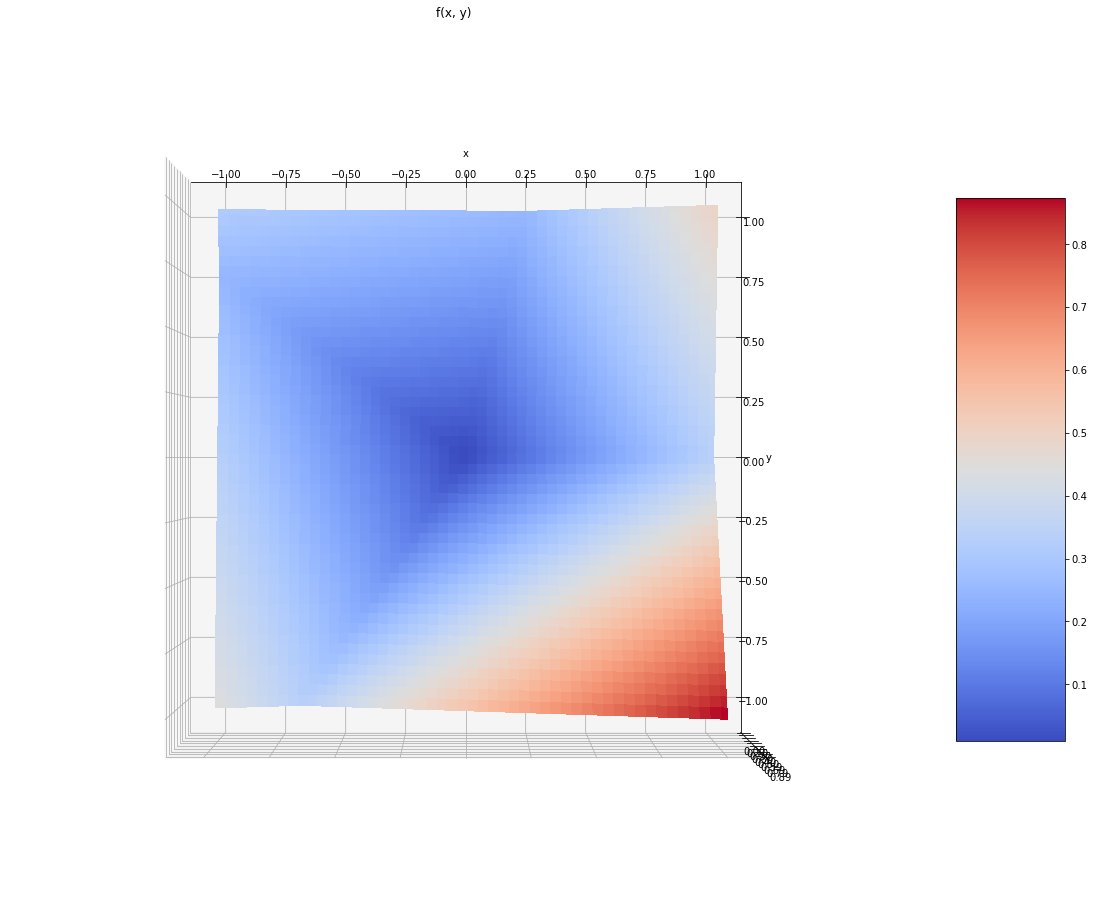

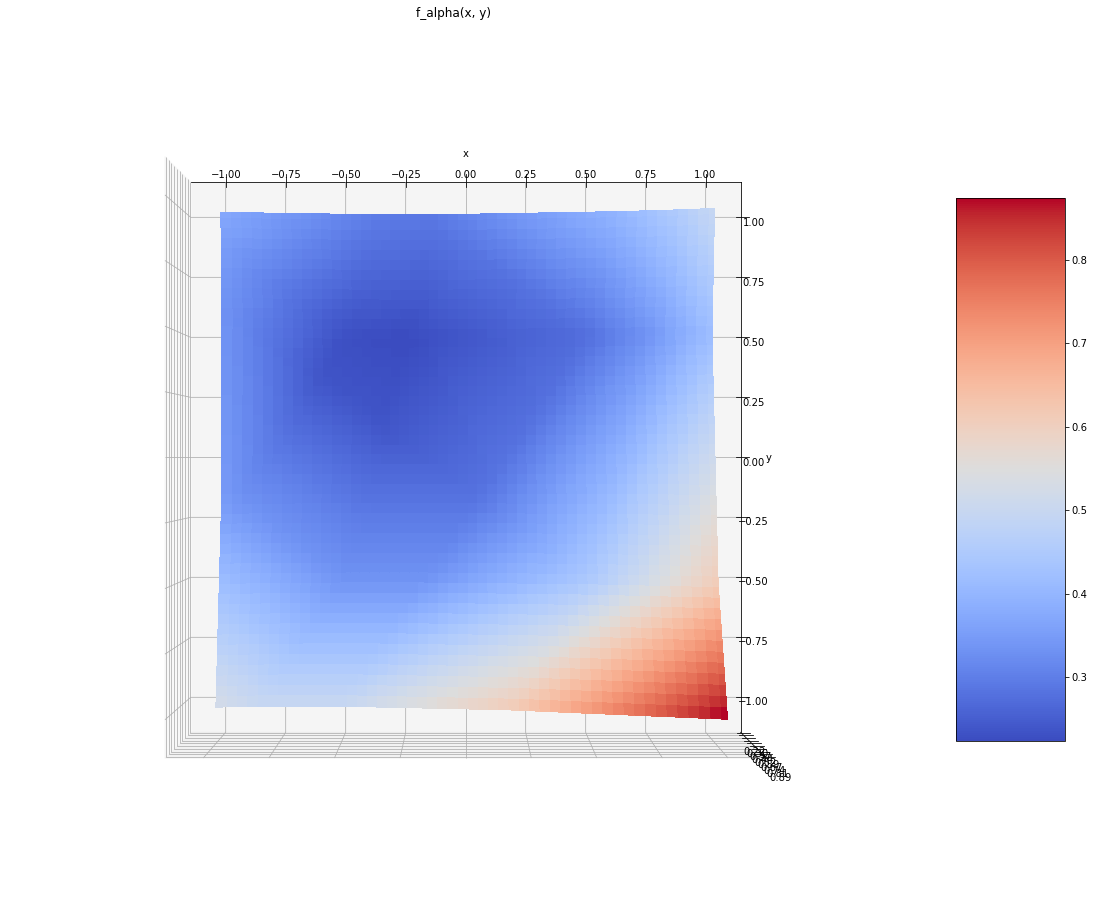

Z_min = 0.0031897926634768883
Z_a_min = 0.22173489278752434

Preserves min = True


In [10]:
f = f_random

xy_angle = 90
z_angle = -90

Z = plot_surface(f, 'f(x, y)', xy_angle, z_angle)
Z_alpha = plot_surface(f_alpha, 'f_alpha(x, y)', xy_angle, z_angle)

find_min(Z, Z_alpha)

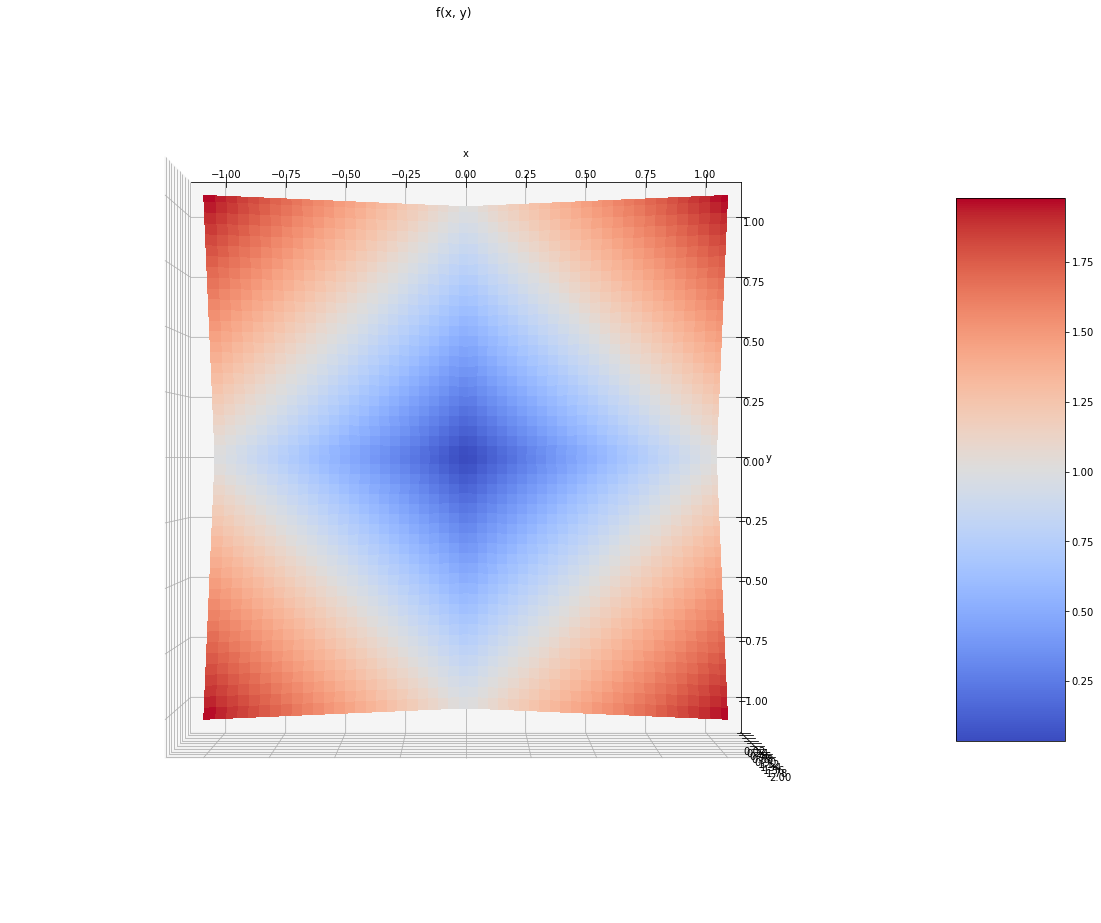

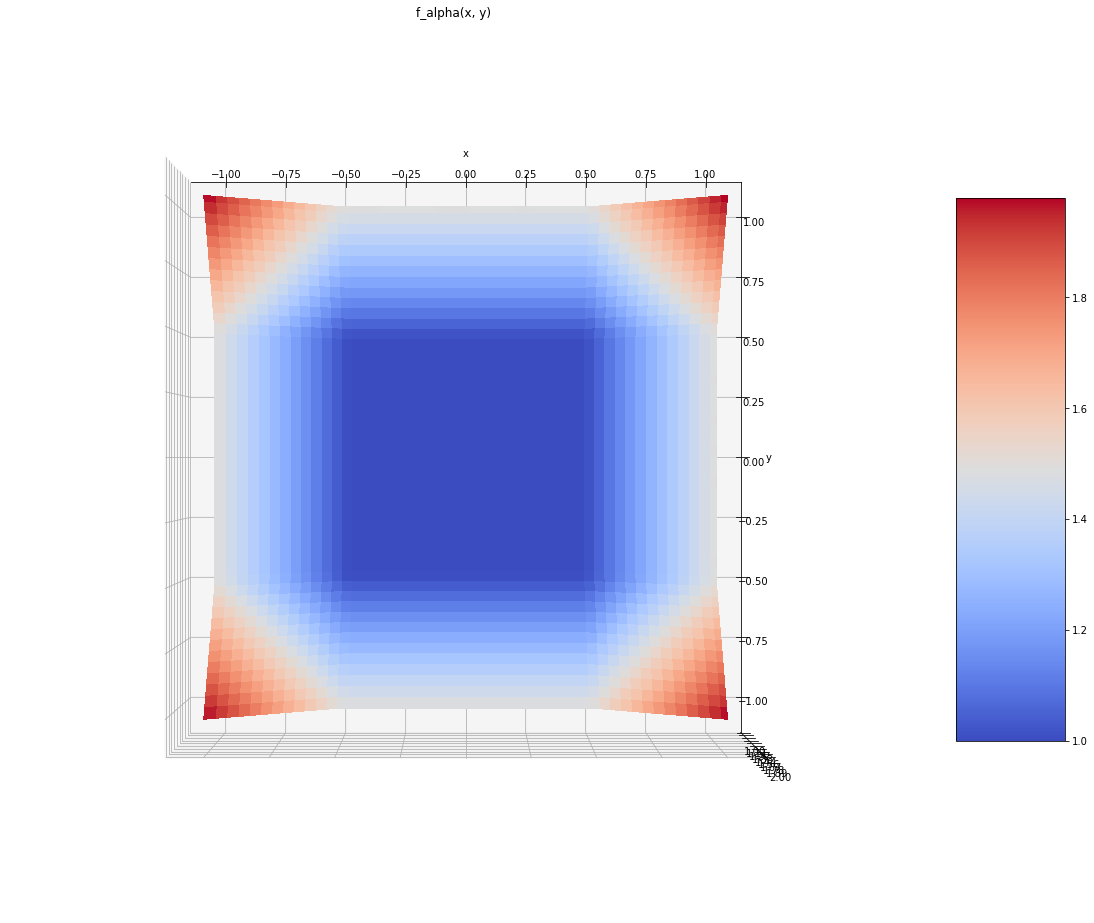

Z_min = 0.02020202020202011
Z_a_min = 0.9999999999999999

Preserves min = False


In [11]:
f = f_mod_1

xy_angle = 90
z_angle = -90

Z = plot_surface(f, 'f(x, y)', xy_angle, z_angle)
Z_alpha = plot_surface(f_alpha, 'f_alpha(x, y)', xy_angle, z_angle)

find_min(Z, Z_alpha)

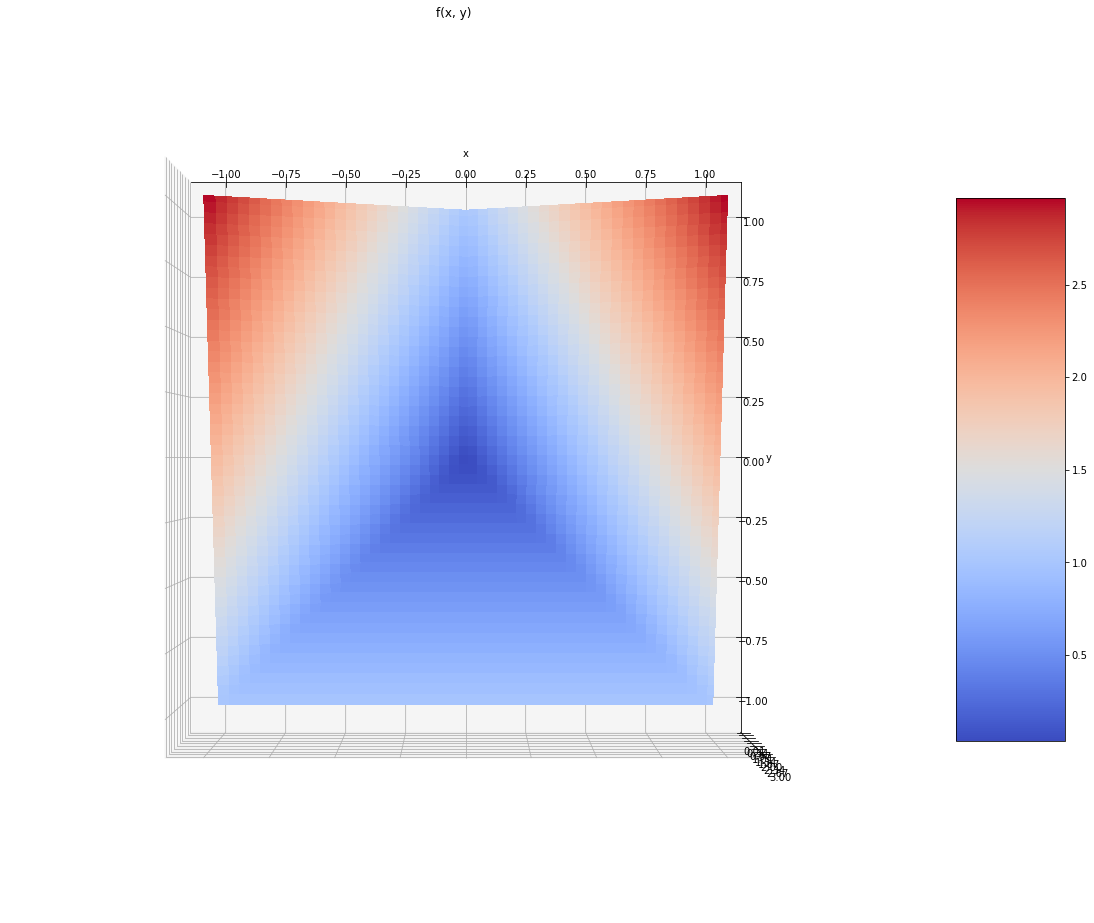

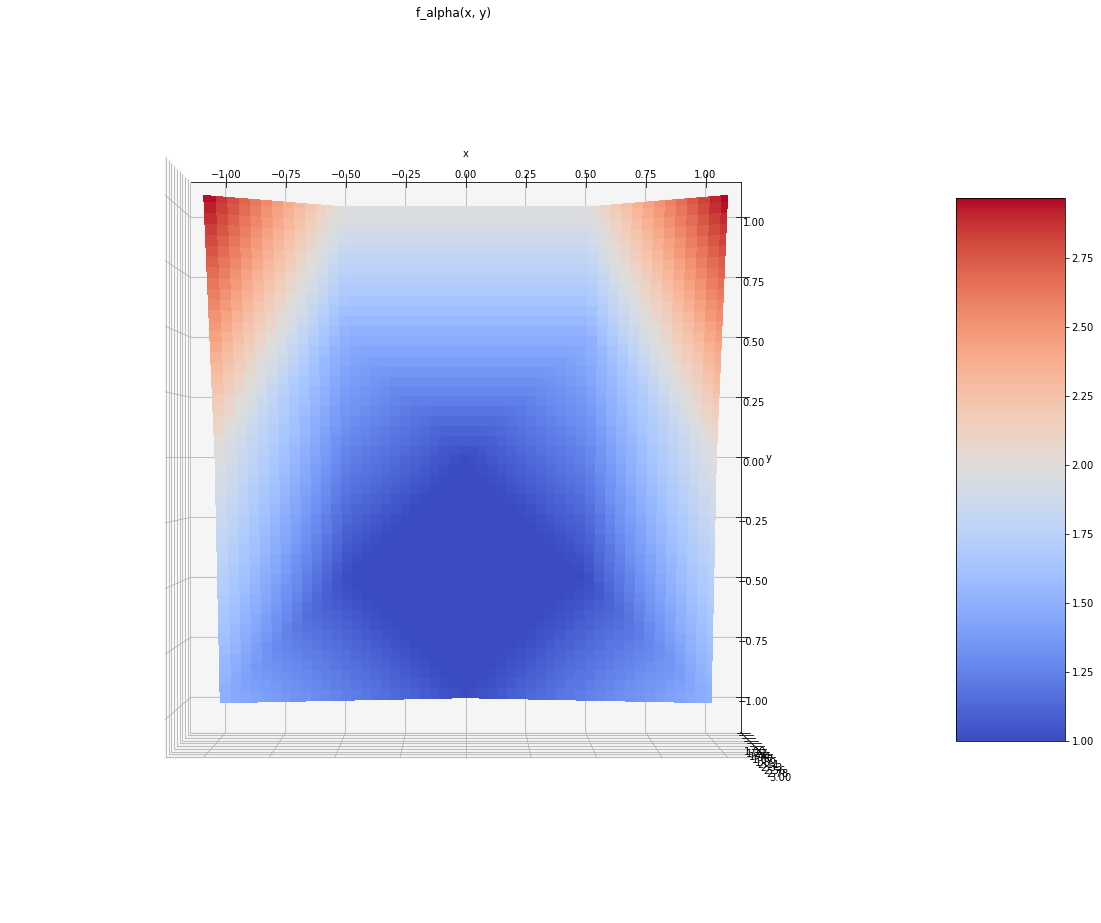

Z_min = 0.010101010101010055
Z_a_min = 0.9999999999999999

Preserves min = False


In [12]:
f = f_triangle

xy_angle = 90
z_angle = -90

Z = plot_surface(f, 'f(x, y)', xy_angle, z_angle)
Z_alpha = plot_surface(f_alpha, 'f_alpha(x, y)', xy_angle, z_angle)

find_min(Z, Z_alpha)

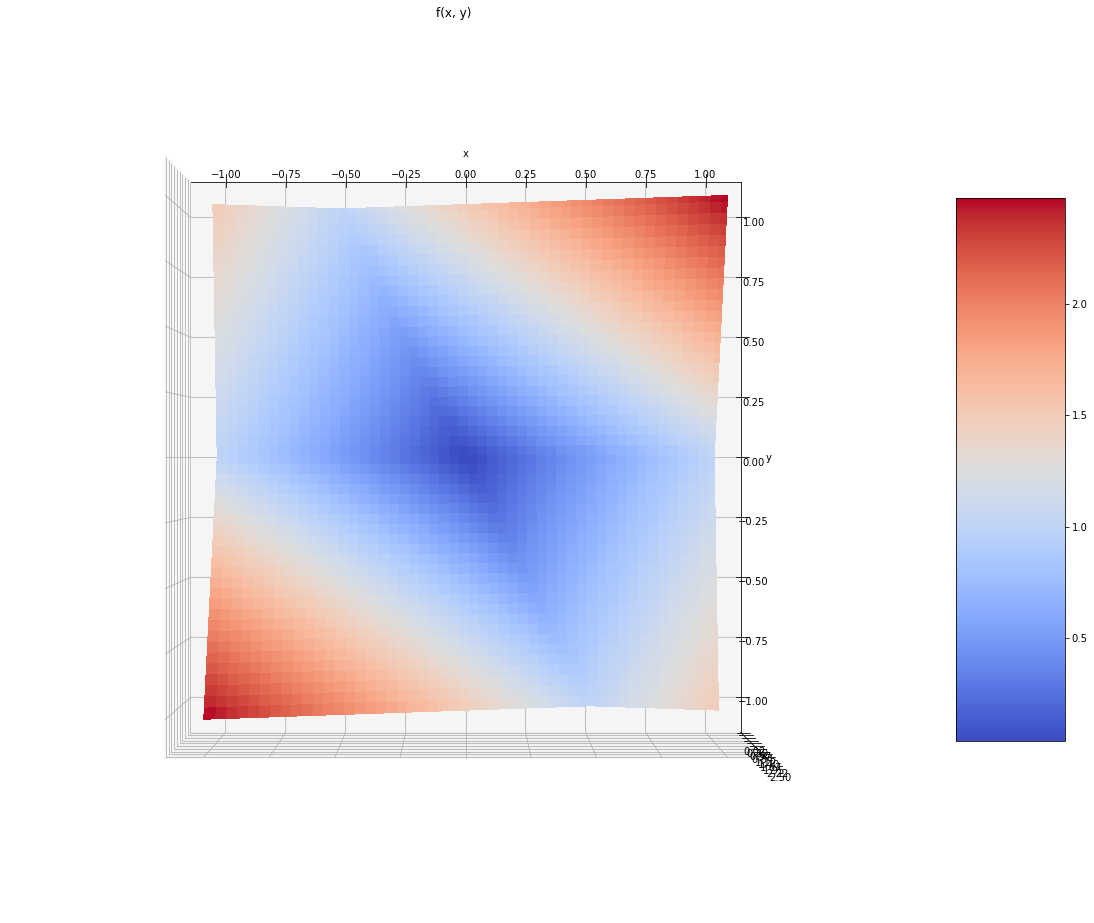

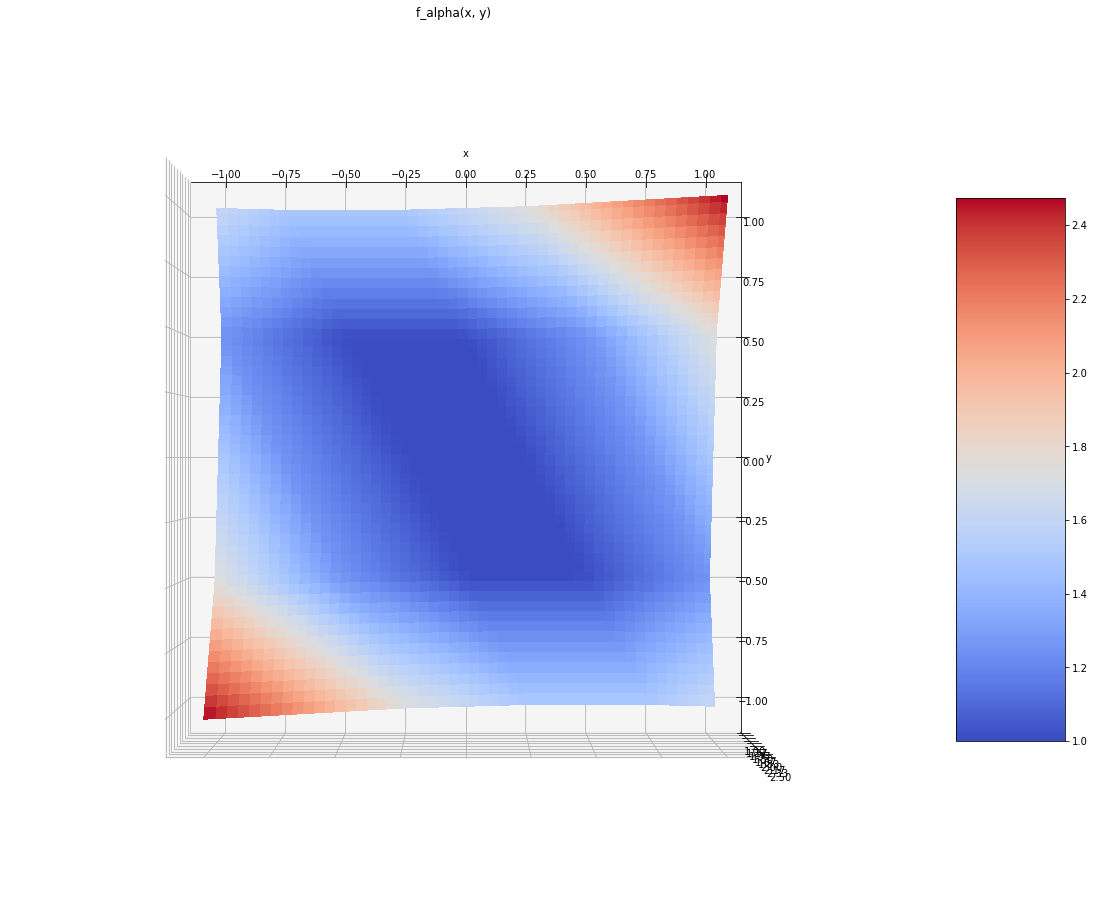

Z_min = 0.015151515151515138
Z_a_min = 0.9999999999999998

Preserves min = False


In [13]:
f = f_mod_3

xy_angle = 90
z_angle = -90

Z = plot_surface(f, 'f(x, y)', xy_angle, z_angle)
Z_alpha = plot_surface(f_alpha, 'f_alpha(x, y)', xy_angle, z_angle)

find_min(Z, Z_alpha)

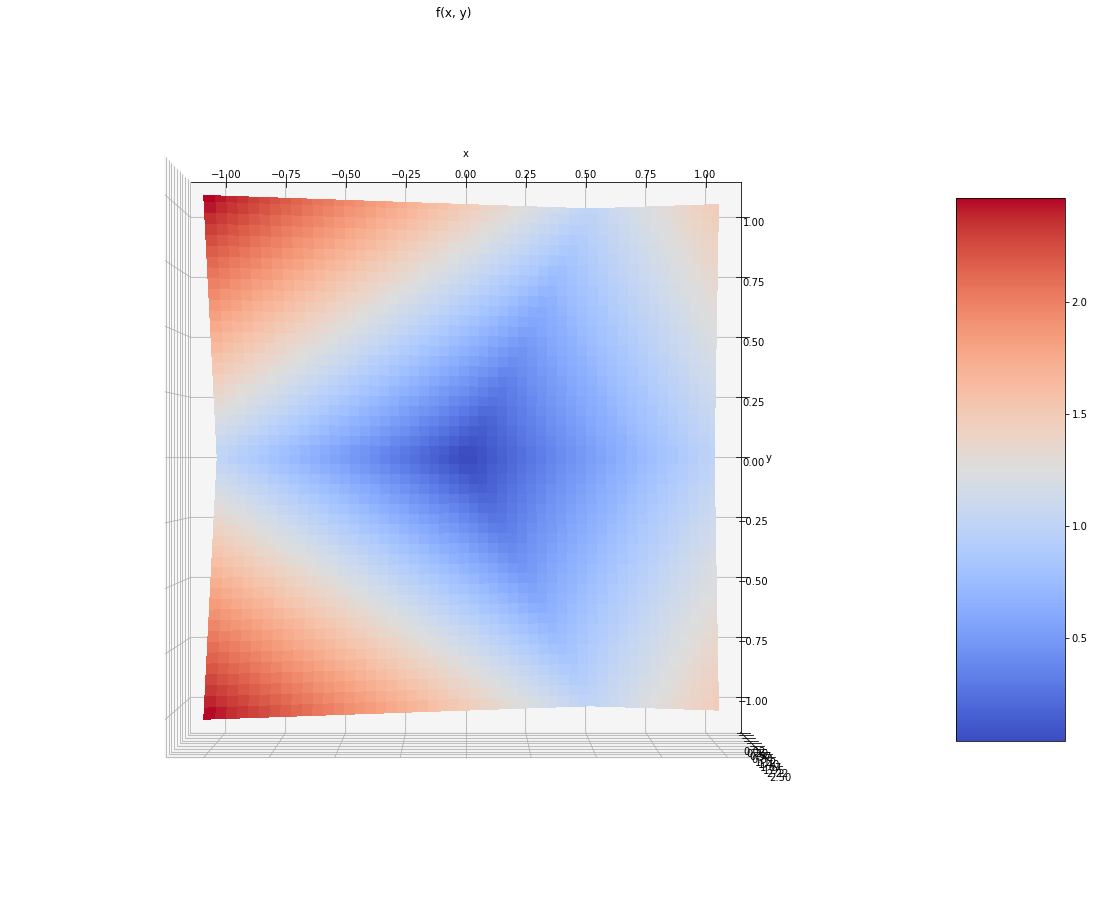

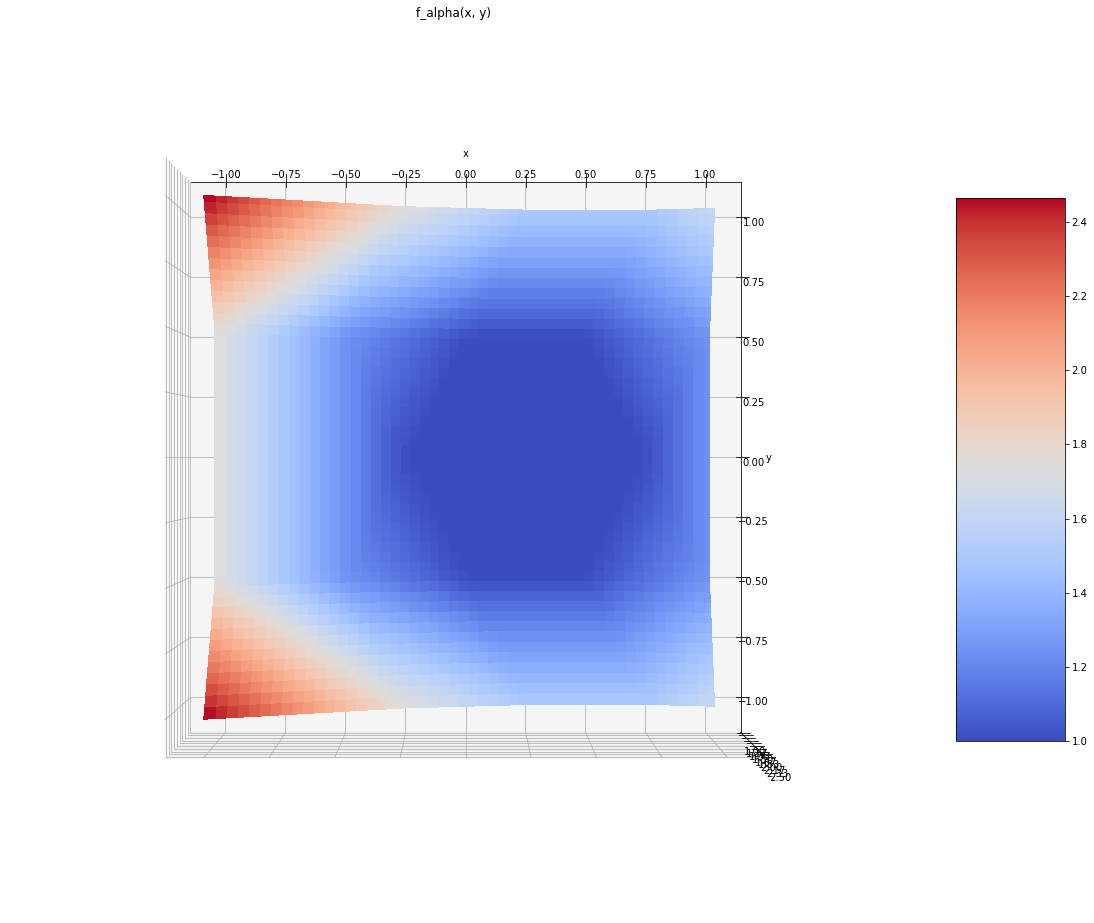

Z_min = 0.015151515151515194
Z_a_min = 0.9999999999999999

Preserves min = False


In [14]:
f = f_mod_4

xy_angle = 90
z_angle = -90

Z = plot_surface(f, 'f(x, y)', xy_angle, z_angle)
Z_alpha = plot_surface(f_alpha, 'f_alpha(x, y)', xy_angle, z_angle)

find_min(Z, Z_alpha)

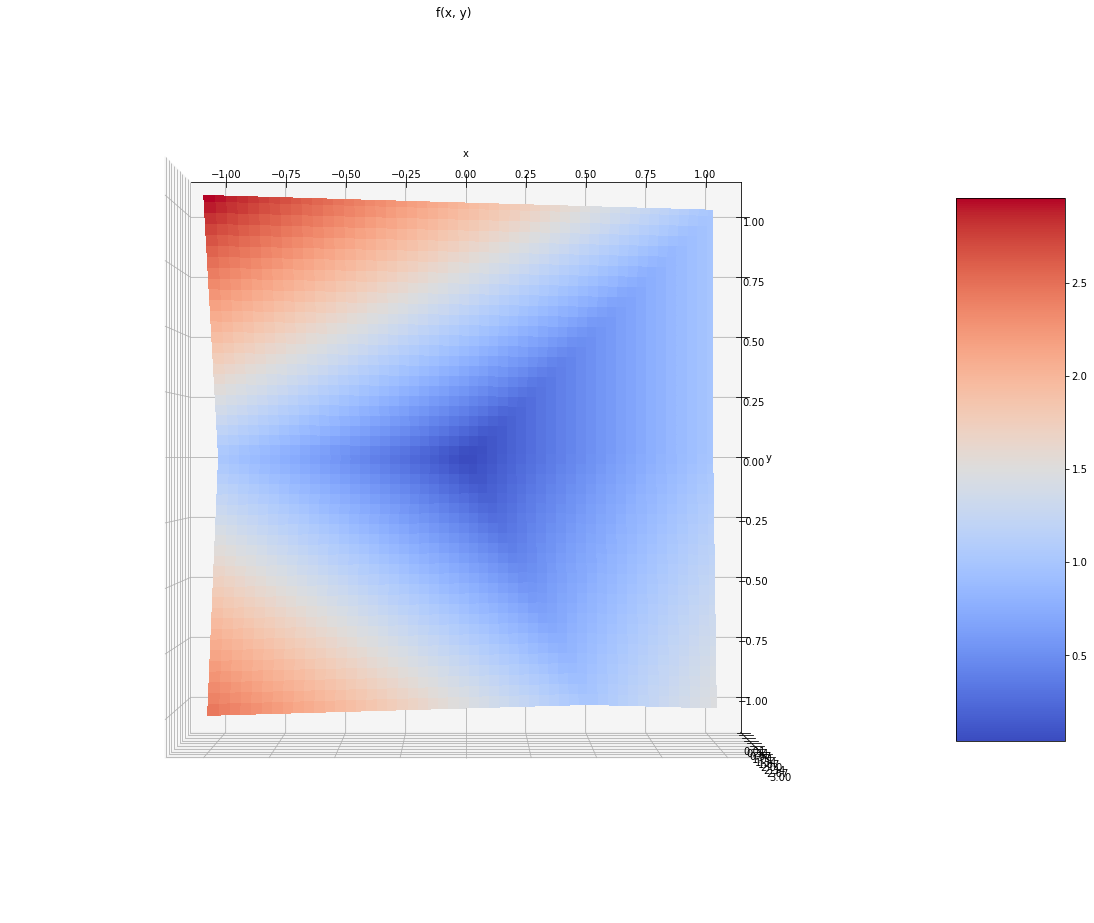

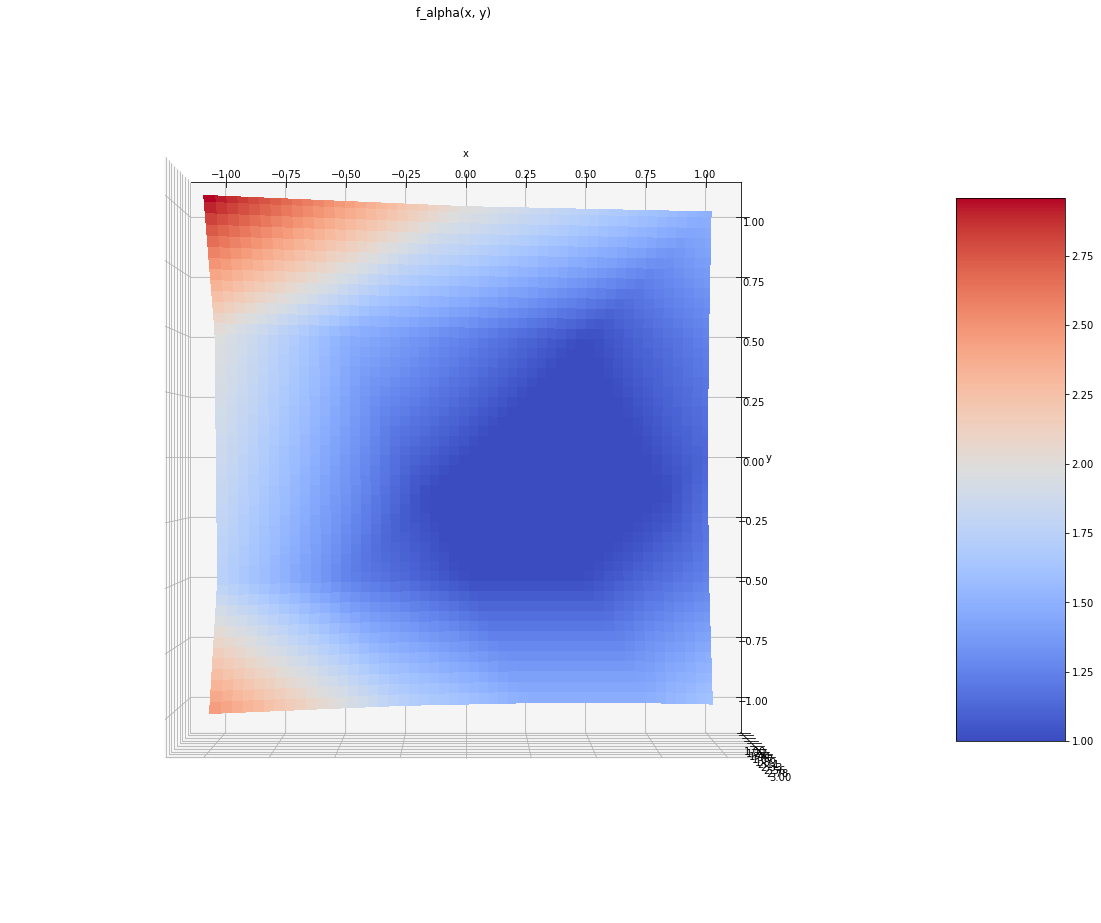

Z_min = 0.010101010101010166
Z_a_min = 0.9999999999999999

Preserves min = False


In [15]:
f = f_mod_5

xy_angle = 90
z_angle = -90

Z = plot_surface(f, 'f(x, y)', xy_angle, z_angle)
Z_alpha = plot_surface(f_alpha, 'f_alpha(x, y)', xy_angle, z_angle)

find_min(Z, Z_alpha)

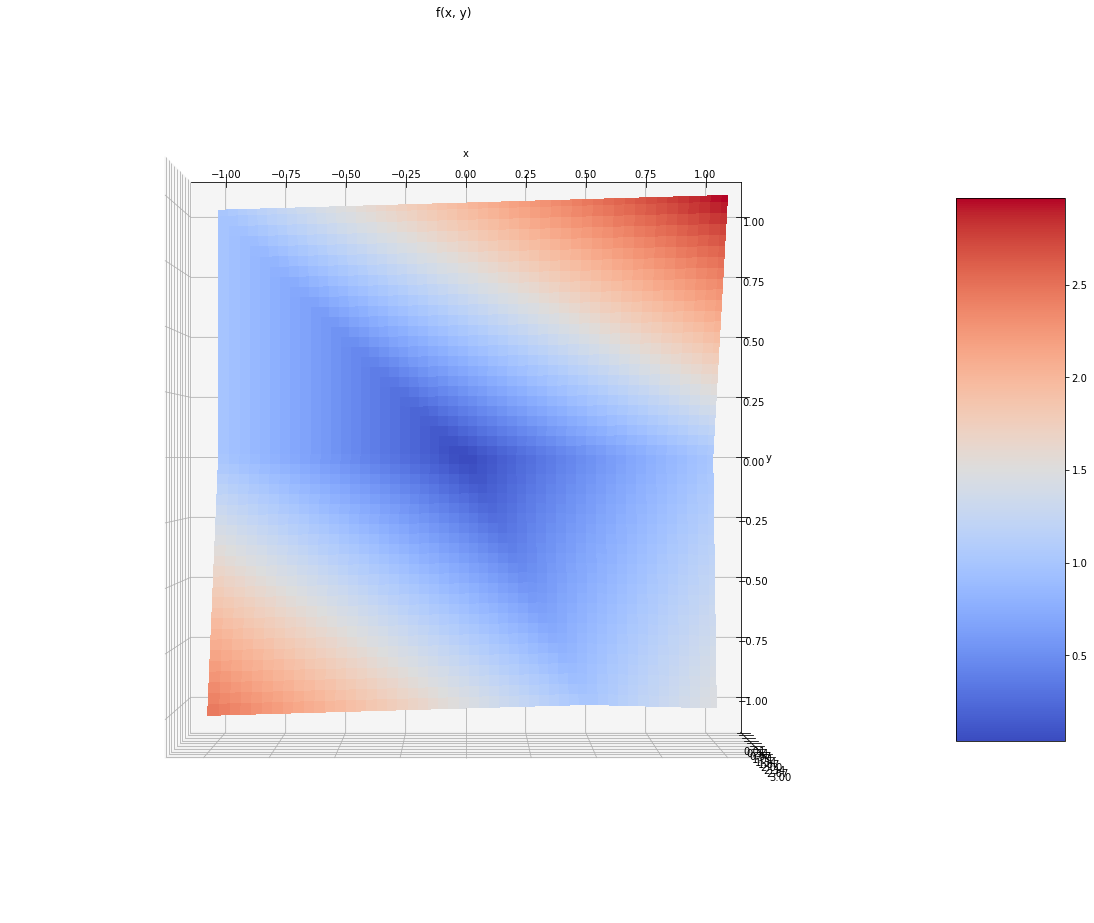

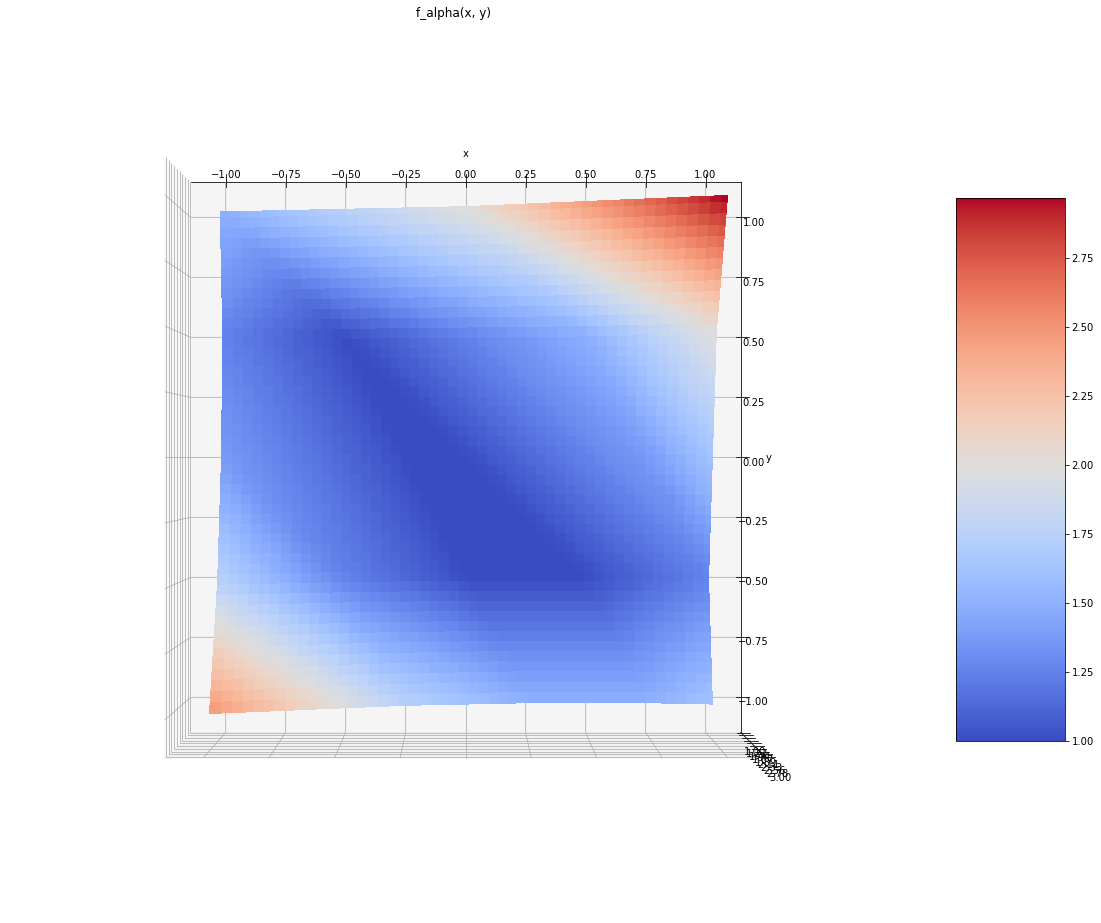

Z_min = 0.010101010101010277
Z_a_min = 0.9999999999999999

Preserves min = False


In [16]:
f = f_mod_6

xy_angle = 90
z_angle = -90

Z = plot_surface(f, 'f(x, y)', xy_angle, z_angle)
Z_alpha = plot_surface(f_alpha, 'f_alpha(x, y)', xy_angle, z_angle)

find_min(Z, Z_alpha)

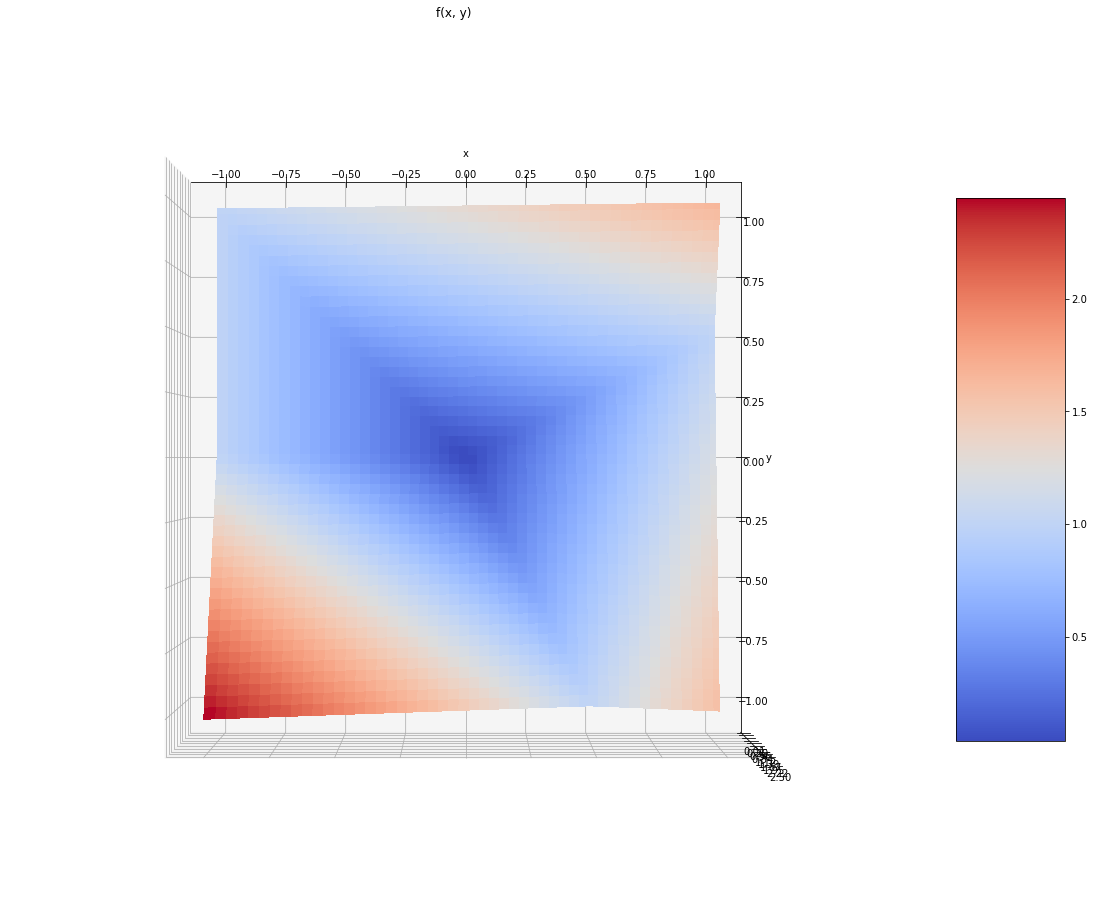

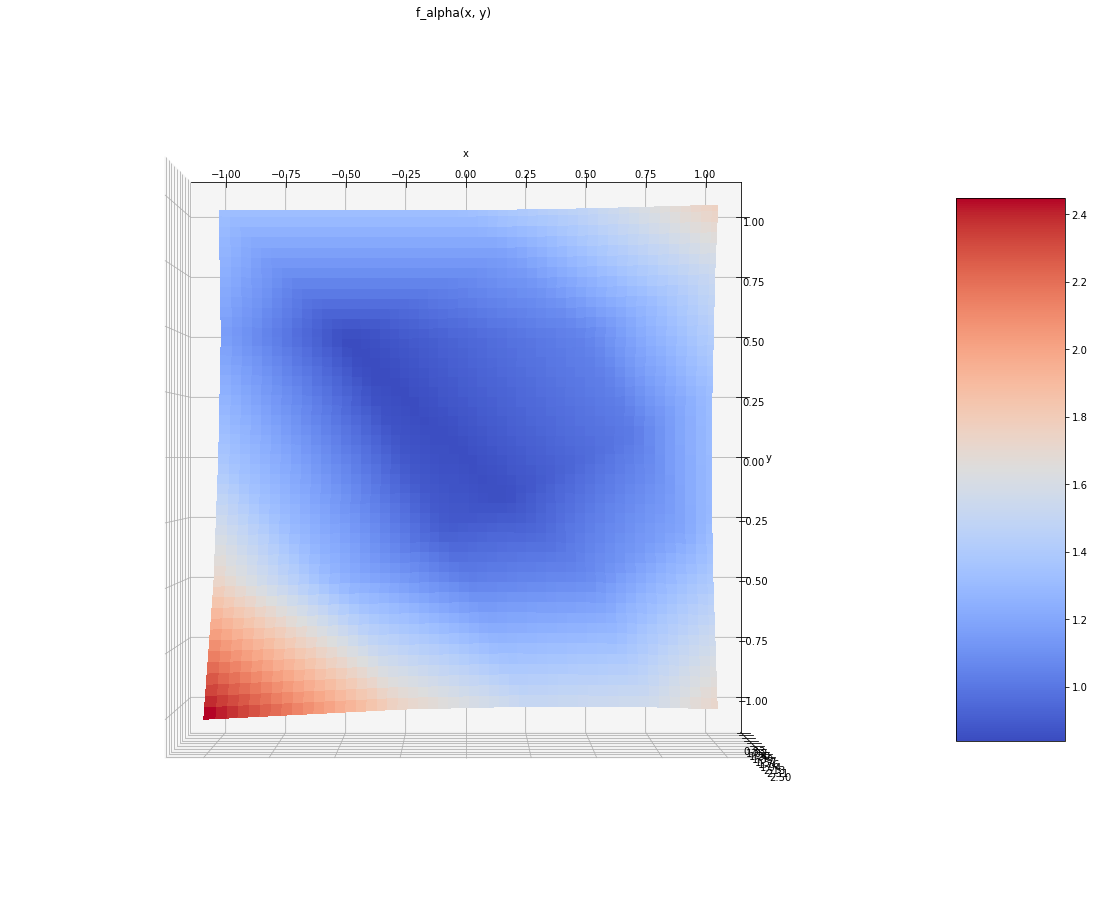

Z_min = 0.010101010101010202
Z_a_min = 0.8334595959595961

Preserves min = True


In [17]:
f = f_mod_7

xy_angle = 90
z_angle = -90

Z = plot_surface(f, 'f(x, y)', xy_angle, z_angle)
Z_alpha = plot_surface(f_alpha, 'f_alpha(x, y)', xy_angle, z_angle)

find_min(Z, Z_alpha)

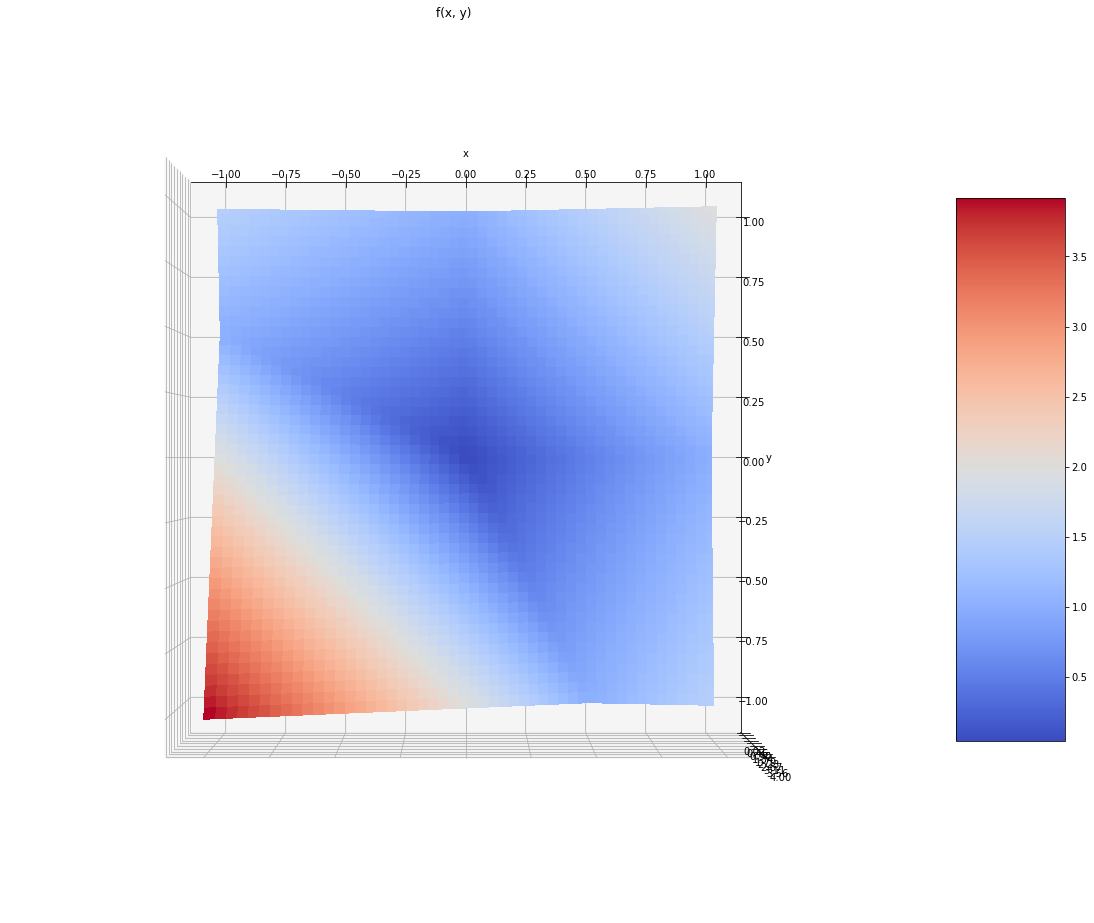

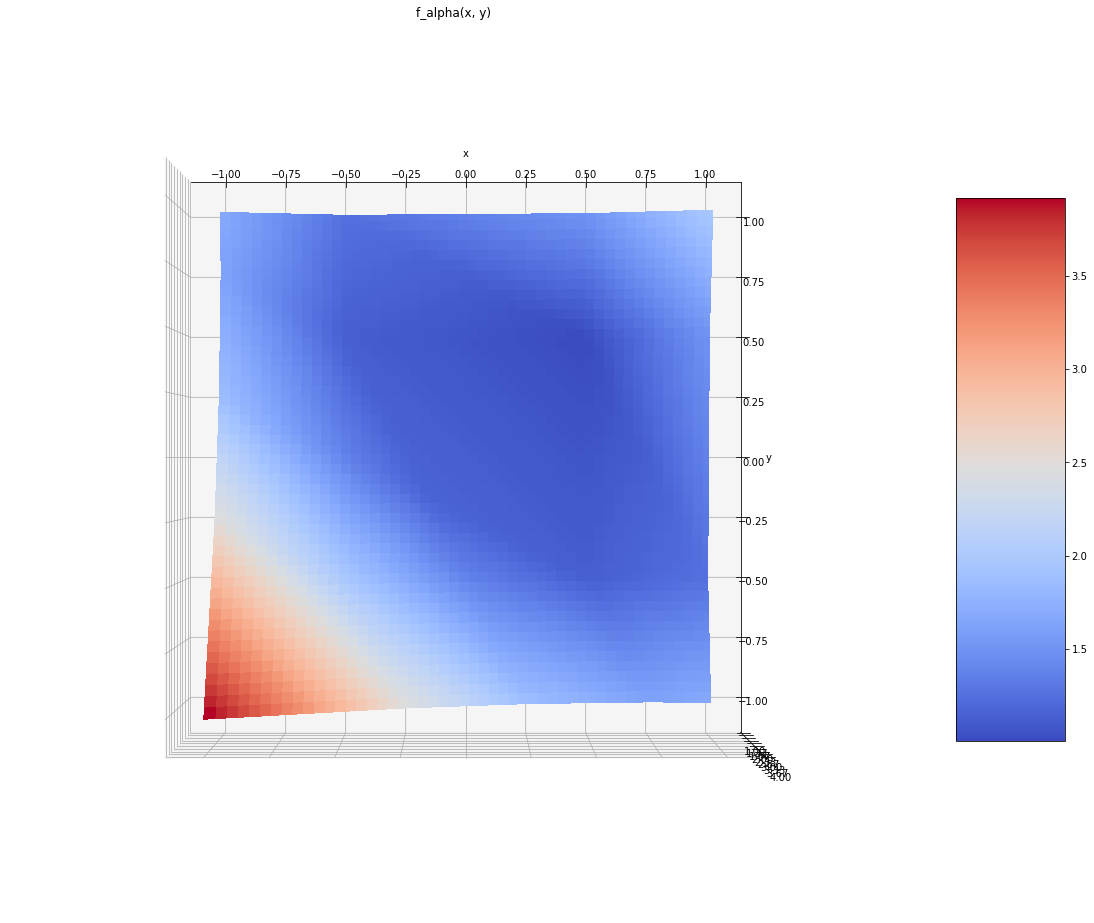

Z_min = 0.015151515151515194
Z_a_min = 1.0012626262626263

Preserves min = True


In [18]:
f = f_mod_8

xy_angle = 90
z_angle = -90

Z = plot_surface(f, 'f(x, y)', xy_angle, z_angle)
Z_alpha = plot_surface(f_alpha, 'f_alpha(x, y)', xy_angle, z_angle)

find_min(Z, Z_alpha)

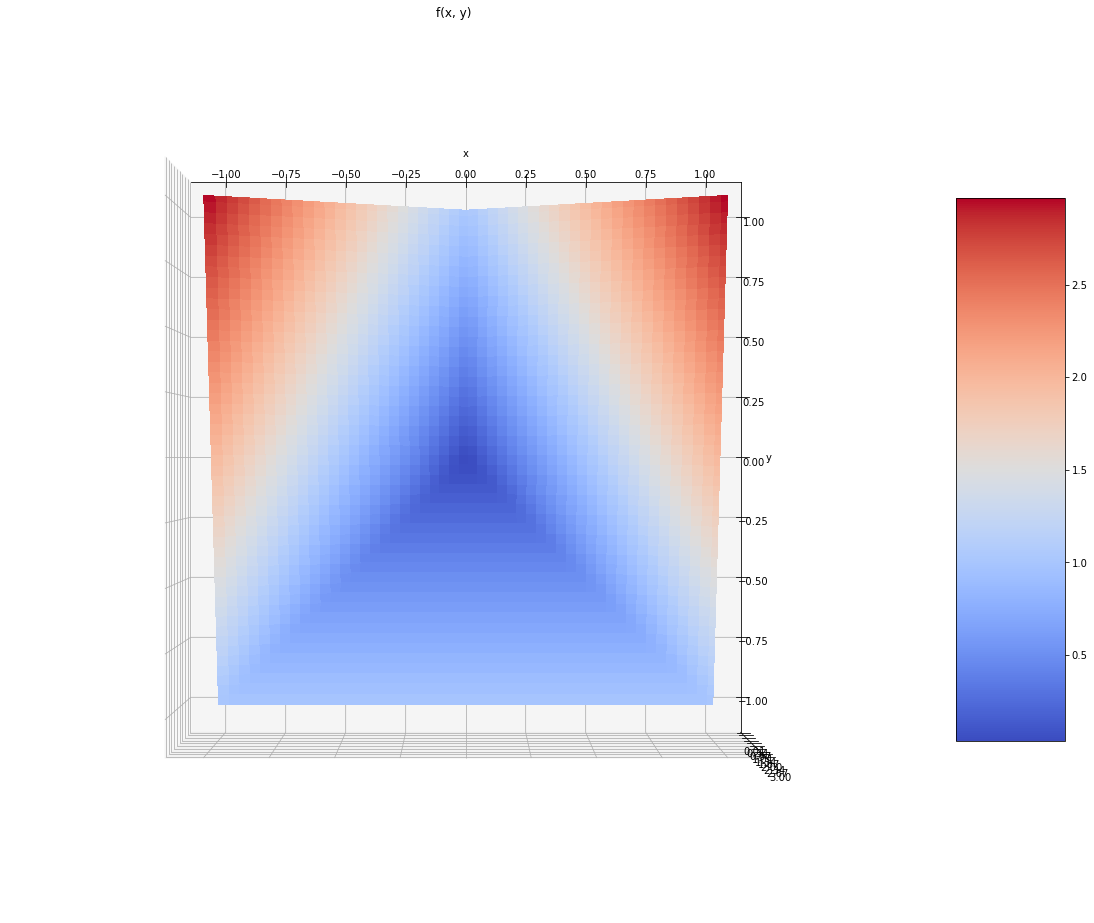

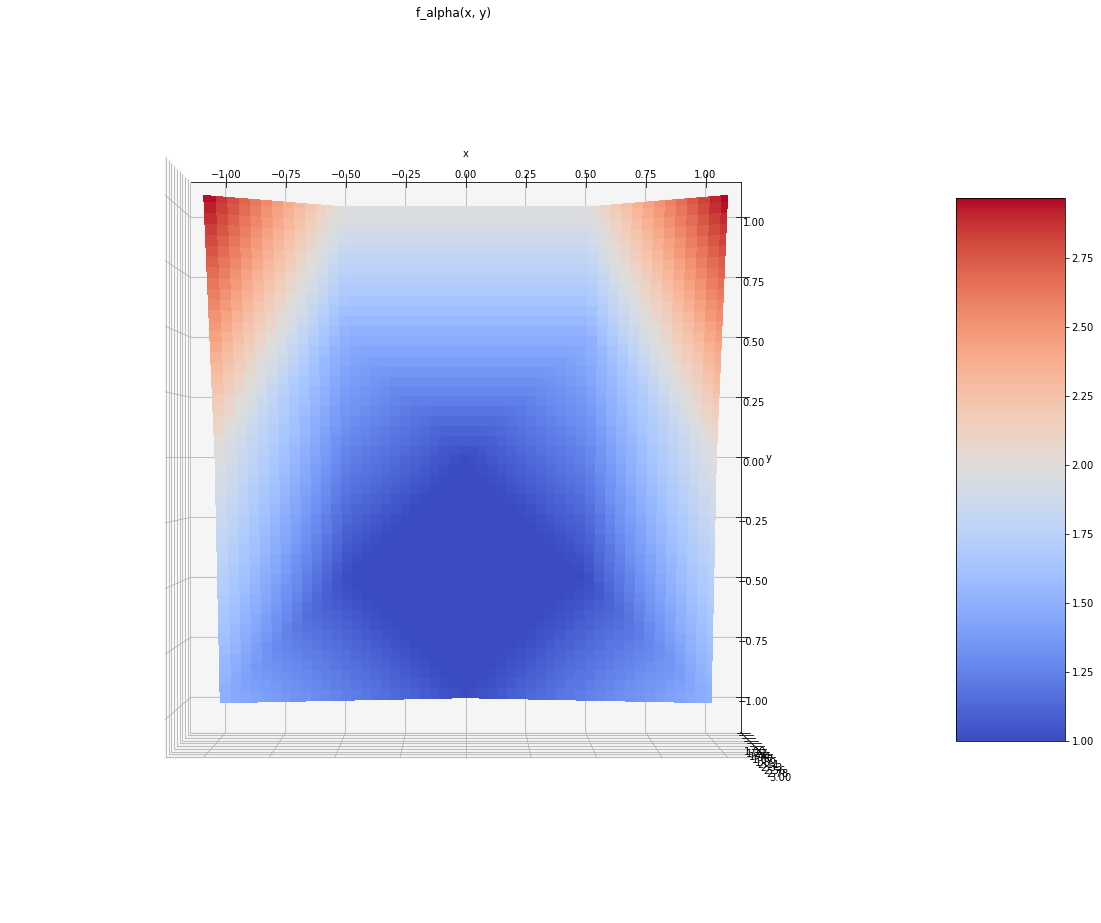

Z_min = 0.010101010101010055
Z_a_min = 0.9999999999999999

Preserves min = False


In [19]:
f = f_triangle

xy_angle = 90
z_angle = -90

Z = plot_surface(f, 'f(x, y)', xy_angle, z_angle)
Z_alpha = plot_surface(f_alpha, 'f_alpha(x, y)', xy_angle, z_angle)

find_min(Z, Z_alpha)